In [149]:
### Data Story ##

In [123]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from pyechonest import config
from pyechonest import song
from pyechonest import artist

In [124]:
# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = "V2KYAQQLNXM5FEUUU"

In [125]:
# Define the starting and ending years 
start_year = 1960
end_year = 2014

In [126]:
# Creation of a list of integers corresponding to all the years we are interested in
years = []
for i in range(start_year, end_year + 1):
    years.append(i)

In [127]:
billboard_length_dict = {}
for year in years:
    # Dictionary init
    billboard_length_dict[year] = {}
    
    # Open CSV file
    billboard_current_year = pd.read_csv('CSV_data/Billboard_Year-End_Hot_100_singles_of_' + str(year) + '.csv')
    
    # Get stats for the "Title" and "Artist(s)" columns
    df_columns = ["Title", "Artist(s)"]
    for df_column in df_columns:
        billboard_length_dict[year][df_column] = {}
        
        # Min values
        min_length = billboard_current_year[df_column].str.len().min()
        min_length_index = billboard_current_year[df_column].str.len().idxmin()
        min_length_string = billboard_current_year[df_column][min_length_index]

        billboard_length_dict[year][df_column]["Min"] = {}
        billboard_length_dict[year][df_column]["Min"]["Val"] = min_length
        billboard_length_dict[year][df_column]["Min"]["Rank"] = min_length_index + 1
        billboard_length_dict[year][df_column]["Min"]["String"] = min_length_string

        # Max values
        max_length = billboard_current_year[df_column].str.len().max()
        max_length_index = billboard_current_year[df_column].str.len().idxmax()
        max_length_string = billboard_current_year[df_column][max_length_index]

        billboard_length_dict[year][df_column]["Max"] = {}
        billboard_length_dict[year][df_column]["Max"]["Val"] = max_length
        billboard_length_dict[year][df_column]["Max"]["Rank"] = max_length_index + 1
        billboard_length_dict[year][df_column]["Max"]["String"] = max_length_string

        # Mean 
        average_length = billboard_current_year[df_column].str.len().mean()
        billboard_length_dict[year][df_column]["Mean"] = average_length

        # Number 1
        number_one_length = len(billboard_current_year[df_column][0])
        number_one_string = billboard_current_year[df_column][0]

        billboard_length_dict[year][df_column]["Number1"] = {}
        billboard_length_dict[year][df_column]["Number1"]["Val"] = number_one_length
        billboard_length_dict[year][df_column]["Number1"]["String"] = number_one_string
    

In [128]:
#billboard_length_dict

In [139]:
# These are the "Tableau 20" colors as RGB + pale gray
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229), (248,248,248)]    
    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [143]:
### Artist names plot ###

# Put the different values in lists as it is easier to plot
min_values = []
max_values = []
mean_values = []
number1_values = []
for year, items in billboard_length_dict.iteritems(): 
    for key, item in items['Artist(s)'].iteritems():
        if key == 'Number1':
            number1_values.append(item['Val'])
        elif key == 'Max':
            max_values.append(item['Val'])
        elif key == 'Min':
            min_values.append(item['Val'])
        elif key == 'Mean':
            mean_values.append(item)

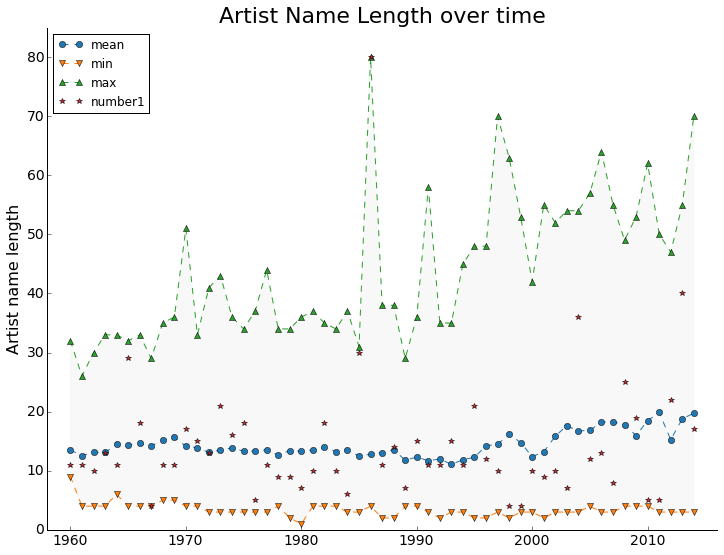

In [145]:
# Plot size
plt.figure(figsize=(12, 9)) 

# Remove the plot frame lines 
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Limit the range of the plot to only where the data is. 
plt.ylim(0, max(max_values) + 5) 
plt.xlim(start_year - 2, end_year + 2)

# Make sure axis ticks are large enough to be easily read.    
plt.xticks(range(start_year, end_year, 10), fontsize=14)  
plt.yticks(range(0, max(max_values) + 5, 10), fontsize=14)  

# Make sure axis labels are large enough to be easily read as well. 
plt.ylabel("Artist name length", fontsize=16)

# Use matplotlib's fill_between() call to fill the area between the different lines
plt.fill_between(years, min_values, max_values, color = tableau20[len(tableau20) - 1]) 

# Plot the mean, min, max and number 1 values  
plt.plot(years, mean_values, marker = 'o', linestyle = '--', color = tableau20[0], label = "mean") 
plt.plot(years, min_values, marker = 'v', linestyle = '--', color = tableau20[2], label = "min") 
plt.plot(years, max_values, marker = '^', linestyle = '--', color = tableau20[4], label = "max") 
plt.plot(years, number1_values, '*', color = tableau20[6], label = "number1") 

# Plot title 
plt.title("Artist Name Length over time", fontsize=22)

# Legend
plt.legend(loc=2) 

# Save the figure as a PNG.    
plt.savefig("Images/Artist-name-length-over-time.png", bbox_inches="tight")

In [146]:
### Song titles plot ###

# Put the different values in lists as it is easier to plot
min_values = []
max_values = []
mean_values = []
number1_values = []
for year, items in billboard_length_dict.iteritems(): 
    for key, item in items['Title'].iteritems():
        if key == 'Number1':
            number1_values.append(item['Val'])
        elif key == 'Max':
            max_values.append(item['Val'])
        elif key == 'Min':
            min_values.append(item['Val'])
        elif key == 'Mean':
            mean_values.append(item)

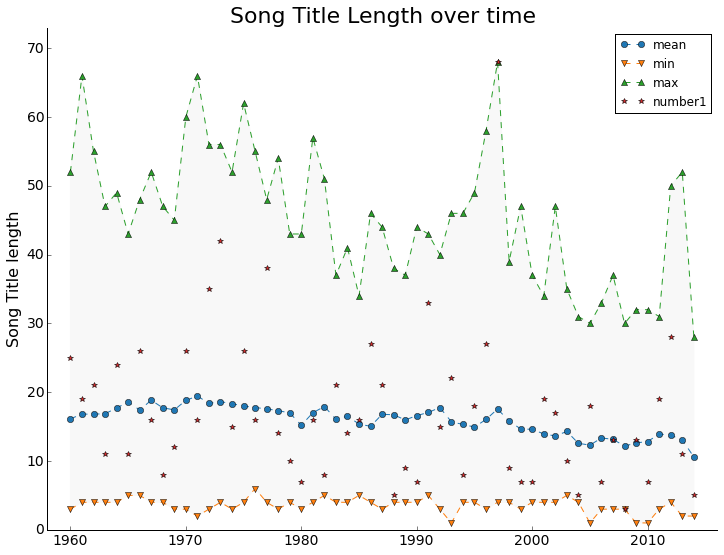

In [148]:
# Plot size
plt.figure(figsize=(12, 9)) 

# Remove the plot frame lines 
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Limit the range of the plot to only where the data is. 
plt.ylim(0, max(max_values) + 5) 
plt.xlim(start_year - 2, end_year + 2)

# Make sure axis ticks are large enough to be easily read.    
plt.xticks(range(start_year, end_year, 10), fontsize=14)  
plt.yticks(range(0, max(max_values) + 5, 10), fontsize=14)  

# Make sure axis labels are large enough to be easily read as well. 
plt.ylabel("Song Title length", fontsize=16)

# Use matplotlib's fill_between() call to fill the area between the different lines
plt.fill_between(years, min_values, max_values, color = tableau20[len(tableau20) - 1]) 

# Plot the mean, min, max and number 1 values  
plt.plot(years, mean_values, marker = 'o', linestyle = '--', color = tableau20[0], label = "mean") 
plt.plot(years, min_values, marker = 'v', linestyle = '--', color = tableau20[2], label = "min") 
plt.plot(years, max_values, marker = '^', linestyle = '--', color = tableau20[4], label = "max") 
plt.plot(years, number1_values, '*', color = tableau20[6], label = "number1") 

# Plot title 
plt.title("Song Title Length over time", fontsize=22)

# Legend
plt.legend(loc=1) 

# Save the figure as a PNG.    
plt.savefig("Images/Song-title-length-over-time.png", bbox_inches="tight")

In [ ]:
# Number of featuring over time (histogram)

In [ ]:
# Artists who appear more than once in the rankings (for each song listed
# show the rank + year + name of the artist)

In [ ]:
# Start to use the Echo Nest API to analyze some more interesting features